In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from zipfile import ZipFile
import sys
sys.path.append('../Code')
from SBS import SBS
from sklearn import metrics
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)


Dataset sin nulos!

In [22]:
# Ruta al archivo ZIP
fname = '../datasets/wine.data.txt'

df = pd.read_csv(fname, header=None)
df.columns = ['Class', 'Alcohol', 
                    'Malic acid', 'Ash', 
                    'Alcalinity of ash', 'Magnesium', 
                    'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 
                    'Proanthocyanins', 
                    'Color intensity', 'Hue', 
                    'OD280/OD315 of diluted wines', 
                    'Proline']
print('Class', np.unique(df['Class']))
df.head()



Class [1 2 3]


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


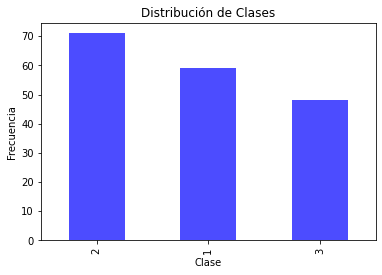

In [23]:
df["Class"].value_counts().plot(kind="bar", color="blue", alpha=0.7)
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")    
plt.show()

In [24]:
df.isna().sum() # Verificar si hay valores nulos

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [25]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [26]:
X = df.drop(columns=['Class'])
y = df['Class']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [29]:
#Tengo que escalar
ss = StandardScaler()
ss.fit(X_train)
#No quiero perder el nombre de las columnas
X_train_scl = X_train.copy()
X_test_scl = X_test.copy()   
X_train_scl.loc[:,X_train_scl.columns] = ss.transform(X_train)
X_test_scl.loc[:, X_test_scl.columns]  = ss.transform(X_test)   


In [30]:
model = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(model, k_features=1, random_state=42) #Resultado depende fuertemente del random_state
sbs.fit(X_train_scl, y_train)



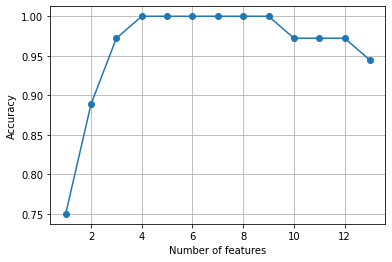

In [31]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.xlabel('Number of features')    
plt.ylabel('Accuracy')
plt.grid()
plt.show()


Parece que 4 es el numero ¿Cuales son esas caracteristicas?

In [32]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12),
 (0, 1, 2, 3, 5, 6, 7, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 9, 12),
 (0, 1, 2, 3, 6, 9, 12),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 3, 6, 9),
 (0, 1, 3, 6),
 (0, 1, 6),
 (0, 6),
 (6,)]

In [35]:
k4 = sbs.subsets_[9]
X_train.iloc[:, list(k4)]

,Alcohol,Malic acid,Alcalinity of ash,Flavanoids
158,14.34,1.68,25.0,1.31
137,12.53,5.51,25.0,0.60
98,12.37,1.07,18.5,3.75
159,13.48,1.67,22.5,1.10
38,13.07,1.50,15.5,2.64
...,...,...,...,...
71,13.86,1.51,25.0,2.86
106,12.25,1.73,19.0,2.03
14,14.38,1.87,12.0,3.64
92,12.69,1.53,20.7,1.46


In [ ]:
k4 = sbs.subsets_[9]
X_train.iloc[:, list(k4)]

,Alcohol,Malic acid,Alcalinity of ash,Flavanoids
158,14.34,1.68,25.0,1.31
137,12.53,5.51,25.0,0.60
98,12.37,1.07,18.5,3.75
159,13.48,1.67,22.5,1.10
38,13.07,1.50,15.5,2.64
...,...,...,...,...
71,13.86,1.51,25.0,2.86
106,12.25,1.73,19.0,2.03
14,14.38,1.87,12.0,3.64
92,12.69,1.53,20.7,1.46


In [36]:
k9 = sbs.subsets_[4]
X_train.iloc[:, list(k9)]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
158,14.34,1.68,2.70,25.0,1.31,0.53,13.00,0.57,660
137,12.53,5.51,2.64,25.0,0.60,0.63,5.00,0.82,515
98,12.37,1.07,2.10,18.5,3.75,0.24,4.50,1.04,660
159,13.48,1.67,2.64,22.5,1.10,0.52,11.75,0.57,620
38,13.07,1.50,2.10,15.5,2.64,0.28,3.70,1.18,1020
...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,2.86,0.21,3.38,1.36,410
106,12.25,1.73,2.12,19.0,2.03,0.37,3.40,1.00,510
14,14.38,1.87,2.38,12.0,3.64,0.29,7.50,1.20,1547
92,12.69,1.53,2.26,20.7,1.46,0.58,3.05,0.96,495
